In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
url = 'https://raw.githubusercontent.com/PittariJonatan/Data-Sets/main/Airline%20Dataset%20Updated.csv'
df = pd.read_csv(url, sep = ',')

___

<h1 align="center">Objetivo del análisis</h1>

Desarrollar un modelo predictivo para evaluar y reducir el riesgo de cancelaciones de vuelos. En este estudio, la variable ***objetivo*** o ***"target"*** será el ***"Flight Status"***, con un enfoque específico en ***predecir*** los ***vuelos*** que tienden a ser clasificados como ***"Cancelled"***.

En este análisis, se emplearán ***modelos predictivos*** para abordar la clasificación binaria de vuelos cancelados o no cancelados. La metodología se enfocará en la selección cuidadosa de características relevantes, la ingeniería de variables significativas y la exploración exhaustiva de los datos disponibles.

<h3 align="center">Contexto comercial</h3>


Los datos de las aerolíneas tienen una inmensa importancia ya que ofrecen información sobre el funcionamiento y la eficiencia de la industria de la aviación. Proporciona información valiosa sobre rutas de vuelo, horarios, datos demográficos de los pasajeros y preferencias, que las aerolíneas pueden aprovechar para optimizar sus operaciones y mejorar las experiencias de los clientes. Al analizar datos sobre retrasos, cancelaciones y puntualidad, las aerolíneas pueden identificar tendencias e implementar estrategias para mejorar la puntualidad y mitigar las interrupciones. Además, los organismos reguladores y los encargados de formular políticas dependen de estos datos para garantizar los estándares de seguridad, hacer cumplir las regulaciones y tomar decisiones informadas sobre las políticas de aviación.

<h3 align="center">Problema comercial</h3>

Las cancelaciones de vuelos son un problema clave en la industria de la aviación. Los datos de las aerolíneas son esenciales para abordar este desafío y mejorar la eficiencia operativa, además de ser cruciales para reguladores, formuladores de políticas y analistas que buscan la seguridad y la toma de decisiones informadas.

<h3 align="center">Contexto analítico</h3>


El data set posee información sobre 98619 filas, las cuales corresponden a un vuelo y pasajero específico, y 15 columnas las cuales detallamos brevemente a continuación:

- ***Passenger ID***: Identificador único para cada pasajero.
- ***First Name***: Nombre del pasajero.
- ***Last Name***: Apellido del pasajero.
- ***Gender***: Género del pasajero (por ejemplo, Masculino, Femenino).
- ***Age***: Edad del pasajero.
- ***Nationality***: Nacionalidad del pasajero.
- ***Airport Name***: Nombre del aeropuerto desde donde el pasajero abordó el vuelo.
- ***Airport Country Code***: Código del país donde se encuentra el aeropuerto.
- ***Country Name***: Nombre del país donde se encuentra el aeropuerto.
- ***Airport Continent***: Continente donde está situado el aeropuerto.
- ***Continents***: Continentes involucrados en la ruta del vuelo.
- ***Departure Date***: Fecha en que el vuelo partió.
- ***Arrival Airport***: Aeropuerto de destino del vuelo.
- ***Pilot Name***: Nombre del piloto que opera el vuelo.
- ***Flight Status***: Estado actual del vuelo (por ejemplo, a tiempo, retrasado, cancelado).

In [3]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


<h3 align="center">Interrogantes</h3>


- ¿Cuál es la tasa general de cancelación de vuelos en el conjunto de datos?

- ¿Existen tendencias o patrones evidentes en las cancelaciones respecto a otras categorías de vuelo?

- ¿Existe una relación entre la nacionalidad de los pasajeros y la frecuencia de cancelaciones de vuelos?

- ¿El país donde se encuentra el aeropuerto de origen afecta la probabilidad de cancelación de vuelos?

- ¿Hay alguna influencia de la edad o género de los pasajeros en la cancelación de vuelos?

- ¿Existen diferencias significativas en la tendencia de cancelaciones entre los continentes involucrados en la ruta del vuelo?

- ¿Las cancelaciones tienden a ocurrir en ciertas fechas o períodos específicos?

- ¿Hay alguna relación entre el piloto a cargo y la probabilidad de cancelación de vuelos?

- ¿El tamaño o la categoría del aeropuerto tienen impacto en la frecuencia de cancelaciones?

___

<div style="text-align:center">
    <h1>Análisis Exploratorio - EDA</h1>
</div>

___

In [4]:
# Creamos una copia de nuestro data set para conservar original y manipular copia.

df_copy = df.copy()

In [5]:
# Comprobamos información en general.

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
# Comprobamos que no haya valores nulos en el data set. 

df_copy.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

Procederemos, en esta instancia, a la reestructuración de df_copy con la finalidad de adaptar la información lo mejor posible para nuestro algoritmo de predicción final. Para ello, incursionaremos en análisis univariados y bivariados de cada una de sus variables en busca de anomalías significativas para incluir en el modelo.

In [7]:
# Mejoramos la legibilidad de ['Passanger ID'] para su posterior manipulación.

df_copy['Passenger ID'] = range(1,len(df_copy) + 1)

In [8]:
# Consideramos que para este Target en específico, las columnas ['First Name', 'Last Name'] no son de relevancia para nuestro modelo a futuro.

df_copy = df_copy.drop(['First Name', 'Last Name'], axis=1)

In [9]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,1,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,2,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,3,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,4,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,5,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,98616,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,98618,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled


___

<center>

### Segmento de variable ['Flight Status']

</center>


___

In [10]:
# Inspeccionamos los valores alojados en ['Flight Status'].

df_copy['Flight Status'].value_counts()

Flight Status
Cancelled    32942
On Time      32846
Delayed      32831
Name: count, dtype: int64

Encontramos nuestra variable target y la seteamos de manera tal que nos sirva para continuar en nuestro análisis.

In [11]:
# Declaramos Flight Status como nuestra variable target ['Status Target'], en donde trataremos todos los vuelos completados como 0 y 1 para todos aquellos que tuvieron cancelación confirmada. Posteriormente procederemos a eliminar la columna ['Flight Status'] ya que la codificamos de una manera mas acorde para el modelo a futuro.

df_copy['Status Target'] = (df_copy['Flight Status']=='Cancelled').astype(int)
df_copy = df_copy.drop(['Flight Status'], axis = 1)

En el contexto de este análisis, es importante aclarar la representación de los estados de vuelo. Mientras que en variable ***"Flight Status"*** se mencionaron tres categorías ***('On Time', 'Delayed', y 'Cancelled')***, en el gráfico de distribución ***se simplificó*** esta información para destacar la probabilidad de cancelación. Se asignó el ***valor '0'*** a los vuelos que estuvieron ***'On Time' o 'Delayed'***, interpretados como vuelos no cancelados, mientras que se asignó el ***valor '1'*** exclusivamente a los vuelos ***'Cancelled'***, que denotan aquellos efectivamente cancelados. Esta simplificación permite una visualización clara de la proporción entre los vuelos cancelados y no cancelados, representados respectivamente por '1' y '0' en el gráfico.

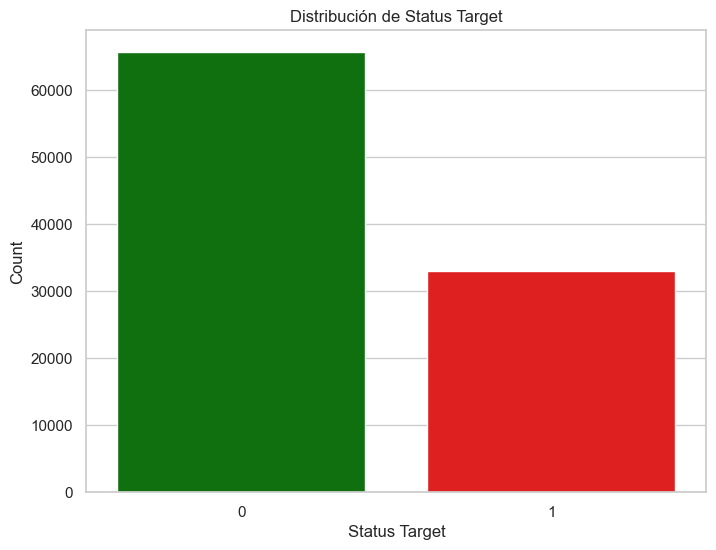

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Status Target', data=df_copy, palette={0: 'green', 1: 'red'})

plt.xlabel('Status Target')
plt.ylabel('Count')
plt.title('Distribución de Status Target')

plt.show()

_______

<center>

### Segmento variable ['Arrival Airport']

</center>




___

En primer lugar, es importante mencionar que esta variable, en su estado original, está representada por códigos de tres letras mayúsculas, los cuales hacen referencia a aeropuertos específicos. Importaremos información relacionada con los nombres correspondientes a cada código desde un servidor externo. Posteriormente, llevaremos a cabo una operación de unión (join) con nuestro df_copy. Con este enfoque, buscamos verificar la precisión de los nombres de los aeropuertos y sustituir la columna de códigos por los nombres correspondientes.

In [13]:
# Importamos datos de una Api, para corroborar ciertas incertidrumbres con ['Arrival Airport'].

url2 = 'https://raw.githubusercontent.com/lxndrblz/Airports/main/airports.csv'
api_1 = pd.read_csv(url2, sep=',')  

In [14]:
df['Arrival Airport'].nunique()


9024

In [15]:
api_1['city_code'].nunique()

9193

In [16]:
api_1.head()

,code,time_zone_id,name,city_code,country_id,location,elevation,url,icao,city,county,state
0,UGL,Antarctica/South_Pole,Union Glacier Blue-Ice Runway,UGL,AQ,POINT (-83.320833 -79.777778),2461,NaN,SCGC,NaN,NaN,NaN
1,SXW,Pacific/Port_Moresby,Sauren,SXW,PG,POINT (148.95305 -5.971389),177,NaN,AYSV,NaN,NaN,NaN
2,NDV,America/New_York,USN Heliport,NDV,US,POINT (-77 38.86667),19,NaN,NaN,NaN,NaN,NaN
3,EAP,Europe/Zurich,EuroAirport Basel-Mulhouse-Freiburg Airport,EAP,CH,POINT (7.529167 47.59),846,NaN,NaN,Basel,NaN,NaN
4,NET,America/Nassau,New Bight,NET,BS,POINT (-75.45763803663925 24.314824100000003),36,NaN,NaN,NaN,NaN,NaN


In [17]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Status Target
0,1,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,0
1,2,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,0
2,3,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,0
3,4,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,0
4,5,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,1
98615,98616,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,1
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,0
98617,98618,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,1


In [18]:
# Joineamos la columna ['name'] de api_1 con nuestro df_copy a través de la columna ['Arrival Airport'] en donde se encuentra el aeropuerto de llegada.

df_copy = pd.merge(df_copy, api_1[['code', 'name']], 
                   how='left', left_on='Arrival Airport', right_on='code')


df_copy = df_copy.drop(columns=['code'])
df_copy = df_copy.drop(columns=['Arrival Airport'])

df_copy = df_copy.rename(columns={'name': 'Arrival Airport'})
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Pilot Name,Status Target,Arrival Airport
0,1,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,Edithe Leggis,0,Coldfoot
1,2,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,Elwood Catt,0,Kugluktuk Airport
2,3,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,Darby Felgate,0,Grenoble-Isere Airport
3,4,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,Dominica Pyle,0,Gatineau Airport
4,5,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,Bay Pencost,0,Gillespie Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,Gareth Mugford,1,Hasvik Airport
98615,98616,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,Kasey Benedict,1,Ambanja
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,Darrin Lucken,0,Los Llanos
98617,98618,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,Gayle Lievesley,1,Gagnoa


Finalizando la revisión de las columnas ***['Airport Name']*** y ***['Arrival Airport']***, realizamos un proceso de joineo utilizando un servicio de API pública que proporciona el código IATA internacional. Observamos que en ambos casos, estos códigos coinciden con las columnas ***['code']*** y ***['name']*** del registro correspondiente. Con esto, podemos afirmar que la columna ***['Airport Name']*** no se refiere al punto de partida del viaje, sino más bien al lugar de llegada. Al confirmar que ***['Arrival Airport']*** es igual a ***['Airport Name']***, procedimos a eliminar la columna ***['Arrival Airport']***, ya que se considera información redundante para nuestro modelo predictivo.

In [19]:
# Contamos los valores NaN y no NaN en la columna 'Arrival Airport'

nan_count = df_copy['Arrival Airport'].isna().sum()
not_nan_count = df_copy['Arrival Airport'].notna().sum()

print("Valores NaN en Arrival Airport:", nan_count)
print("Valores no NaN en Arrival Airport:", not_nan_count)

Valores NaN en Arrival Airport: 2521
Valores no NaN en Arrival Airport: 96098


In [20]:
# Rellenamos los valores NaN en Arrival Airport con los valores de Airport Name

df_copy['Arrival Airport'].fillna(df_copy['Airport Name'], inplace=True)

En el proceso de limpieza y preparación de datos, hemos observado que existen valores faltantes ***(NaN)*** en la columna ***["Arrival Airport]"***. Dado que estos valores faltantes ***representan una proporción pequeña*** del conjunto de datos y no son críticos para nuestro análisis, hemos decidido proceder con una ***estrategia para rellenar estos valores de manera adecuada***.

Dado que un vuelo sin un aeropuerto de llegada registrado podría considerarse como un vuelo local, hemos optado por rellenar los valores NaN en la columna "Arrival Airport" con los valores correspondientes de la columna "Airport Name". Esta decisión se basa en la ***suposición*** de que ***si no se registra un aeropuerto de llegada, el vuelo se considera local y tiene el mismo aeropuerto de salida***.

___

<center>

### Segmento variable ['Airport Name']

</center>


___

In [21]:
# Observemos primero la cantidad de aeropuertos registrados en df_copy.

df_copy['Airport Name'].nunique()

9062

In [22]:
# Comenzamos a explorar la composición de dicha variable.

df_copy['Airport Name'].value_counts().describe()

count    9062.000000
mean       10.882697
std         3.478763
min         1.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        43.000000
Name: count, dtype: float64

In [23]:
# En esta parte, buscaremos obtener la cuenta de registros por aeropuerto y filtrar los nombres de aeropuertos que tienen menos de 5 registros.
airport_counts = df_copy['Airport Name'].value_counts()

airports_to_remove = airport_counts[airport_counts < 5].index

df_copy = df_copy[~df_copy['Airport Name'].isin(airports_to_remove)]

Eliminamos todos aquellos Aeropuertos registrados en nuestro df_copy con menos de 5 vuelos registrados, ya que consideramos que no son significativos en volúmen para nuestro análisis.

In [24]:
# Creamos variable ['cancelled_airports_counts'] para determinar si existe una correlación fuerte entre la cantidad de cancelacionces con respecto al aeropuerto.

cancelled_airports_counts = df_copy[df_copy['Status Target'] == 1]['Airport Name'].value_counts()


correlation = df_copy.groupby('Airport Name')['Status Target'].mean().corr(cancelled_airports_counts)
correlation

0.7469528626718102

Como observamos anteriormente, la cantidad de cancelaciones presenta una correlación significativa con la variable ***['Airport Name']*** (que, recordemos, indica el lugar de origen del vuelo). Procederemos a evaluar esta relación mediante la creación de una nueva columna llamada ***['Cancellation Percentage per Airport']***, la cual calculará el ***porcentaje de cancelaciones para cada aeropuerto*** en relación con el total de vuelos del mismo.

In [25]:
df_copy['Cancellation Percentage per Airport'] = (df_copy.groupby('Airport Name')['Status Target'].transform('mean') * 100).round(2)

df_copy[['Airport Name', 'Cancellation Percentage per Airport']]

C:\Users\Jona\AppData\Local\Temp\ipykernel_7128\498804383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Cancellation Percentage per Airport'] = (df_copy.groupby('Airport Name')['Status Target'].transform('mean') * 100).round(2)


,Airport Name,Cancellation Percentage per Airport
0,Coldfoot Airport,18.18
1,Kugluktuk Airport,22.22
2,Grenoble-Isère Airport,26.67
3,Ottawa / Gatineau Airport,42.86
4,Gillespie Field,45.45
...,...,...
98614,Hasvik Airport,22.22
98615,Ampampamena Airport,21.43
98616,Albacete-Los Llanos Airport,46.15
98617,Gagnoa Airport,20.00


In [26]:
# Filtraremos los aeropuertos con un porcentaje de cancelación mayor al 60%

high_cancelation_airports = df_copy[df_copy['Cancellation Percentage per Airport'] > 60]

count_high_cancelation_airports = high_cancelation_airports['Airport Name'].nunique()

count_high_cancelation_airports

330

___

<center>

### Segmento variable ['Pilot Name']

</center>


___

In [27]:
# Observamos el contenido de ['Pilot Name'].

df_copy['Pilot Name']

0            Edithe Leggis
1              Elwood Catt
2            Darby Felgate
3            Dominica Pyle
4              Bay Pencost
               ...        
98614       Gareth Mugford
98615       Kasey Benedict
98616        Darrin Lucken
98617      Gayle Lievesley
98618    Wilhelmine Touret
Name: Pilot Name, Length: 98073, dtype: object

In [28]:
# Controlamos la cantidad máxima de vuelos que posee registrado cada piloto en este data set.

max_flights_per_pilot = df_copy.groupby('Pilot Name')['Passenger ID'].count().max()

max_flights_per_pilot


2

In [29]:
# Eliminamos la columna ['Pilot Name'] ya que como máximo un piloto llego a tener dos vuelos, no es una variable significativa para nuestro modelo a futuro.

df_copy = df_copy.drop(['Pilot Name'], axis=1)

___

#### Drop de columnas no significativas y renombramiento de otras en busca de una mejor legibilidad.

In [30]:
# Renombramos la columna ['Country Name'] por ['Country'] para mayor entendimiento y practicidad.

df_copy.rename(columns = {'Country Name':'Country'}, inplace = True)

In [31]:
# Eliminamos la columna ['Airport Country Code'], dado que tomaremos esta misma como información redundante.

df_copy = df_copy.drop(['Airport Country Code'], axis = 1)

In [32]:
# Eliminamos la columna ['Airport Continent'], dado que tomaremos esta misma como información redundante.

df_copy = df_copy.drop(['Airport Continent'], axis = 1)

___

In [33]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport,Cancellation Percentage per Airport
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot,18.18
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport,22.22
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport,26.67
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport,42.86
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field,45.45
...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport,22.22
98615,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja,21.43
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos,46.15
98617,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa,20.00


___

<h3 align="center">Segmento variable ['Continents']</h3>


___

In [34]:
# Obersevamos los valores de ['Continents'].

df_copy['Continents'].value_counts()

Continents
North America    31878
Asia             18561
Oceania          13774
Europe           12260
Africa           10925
South America    10675
Name: count, dtype: int64

In [35]:
# Creamos la variable ['cancelled_continents_counts'] para comprobar si aproximadamente la relación 1/3 que se presenta en líneas generales en los valores totales de cancelled con respecto a filled. Confirmamos que es correcto.

cancelled_continents_counts = df_copy[df_copy['Status Target'] == 1]['Continents'].value_counts()
cancelled_continents_counts

Continents
North America    10642
Asia              6214
Oceania           4590
Europe            4073
Africa            3628
South America     3623
Name: count, dtype: int64

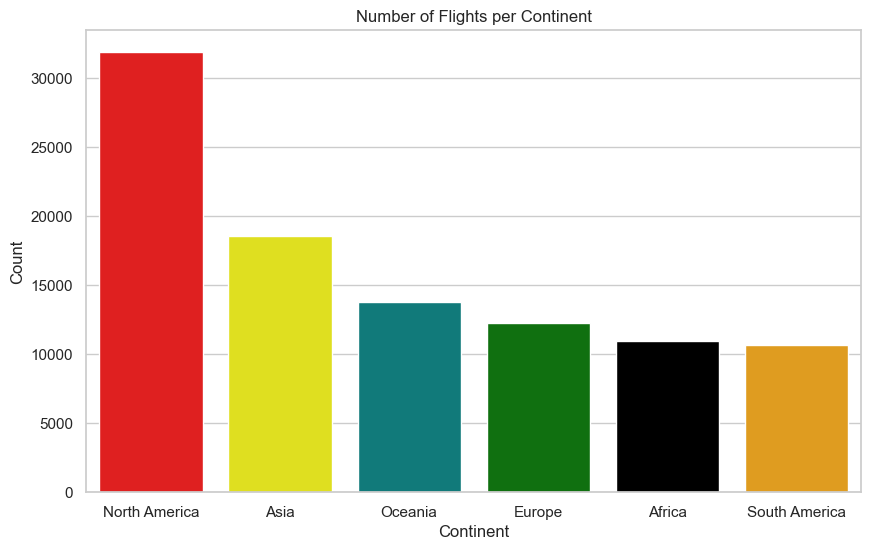

In [36]:
# Visualizamos la cantidad de vuelos por continente para empezar a entender el comportamiento de esta variable.

colors = {'North America': 'red', 'Asia': 'yellow', 'Oceania': 'darkcyan', 'Europe': 'green', 'Africa': 'black', 'South America': 'orange'}

continents_counts = df_copy['Continents'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=continents_counts.index, y=continents_counts, palette=colors)
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Number of Flights per Continent')
plt.show()

In [37]:
# Creamos variable ['airports_per_continent'] para confirmar que efectivamente existe una relación directa en la cantidad de vuelos que realiza un continente, con respecto a la cantidad de aeropuertos que contiene cada uno.

airports_per_continent = df_copy.groupby('Continents')['Arrival Airport'].nunique().sort_values(ascending=False)
airports_per_continent

Continents
North America    2694
Asia             1688
Oceania          1271
Europe           1117
Africa            999
South America     960
Name: Arrival Airport, dtype: int64

Hasta este punto, inicialmente evalué la cantidad total de vuelos por continente. Posteriormente, examiné si la cantidad de aeropuertos se correlaciona positivamente con la cantidad de vuelos, confirmando esta relación. Finalmente, verifiqué que la ***proporción de cancelaciones*** con ***respecto a los vuelos completados***, que se ***mantiene en aproximadamente 1/3***, sigue siendo consistente sin anomalías detectadas. Todos los resultados obtenidos hasta el momento son coherentes con las expectativas establecidas.

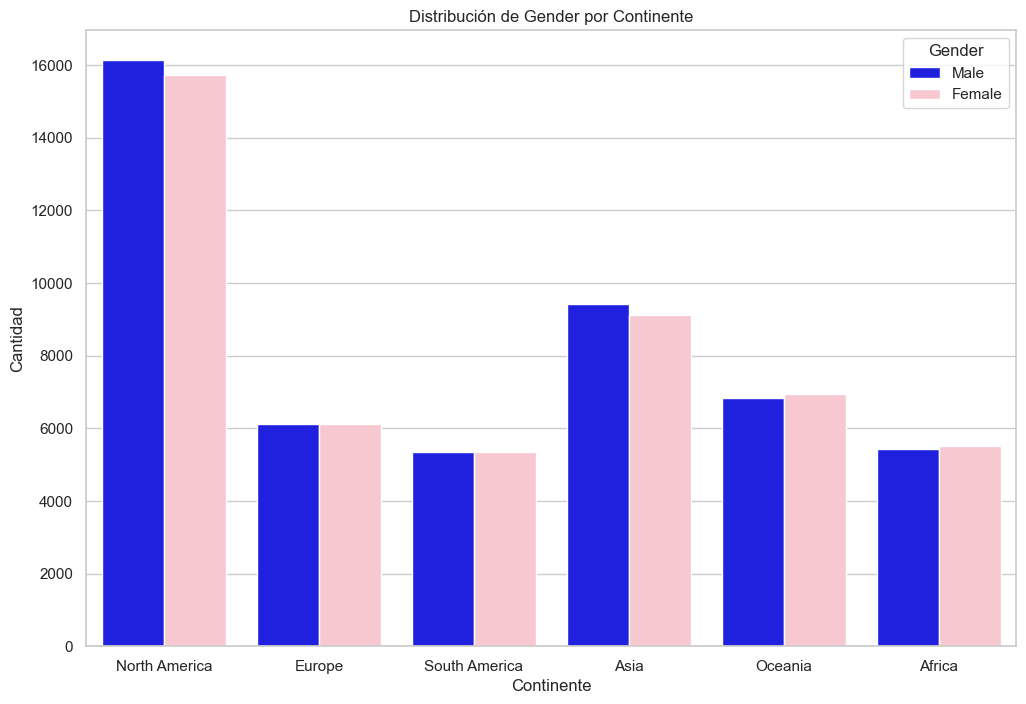

In [38]:
# Grafiquemos ahora la relación ['Gender'] y ['Continents'], en buscas de anomalías.


plt.figure(figsize=(12, 8))
sns.countplot(x='Continents', hue='Gender', data=df_copy, hue_order=['Male', 'Female'], palette={'Male': 'blue', 'Female': 'pink'}, dodge=True)
plt.xlabel('Continente')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Continente')
plt.legend(title='Gender')
plt.show()

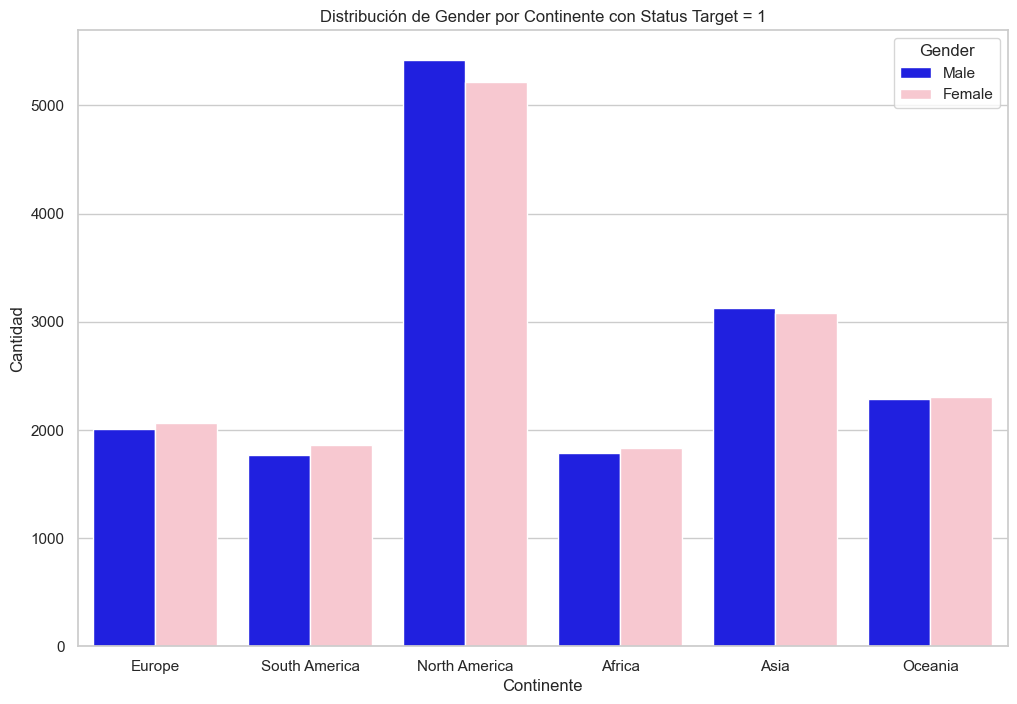

In [39]:
# Ahora observemos si sigue manteniendo la misma relación en los casos donde ['Status Flight'] es 1.


df_status_1 = df_copy[df_copy['Status Target'] == 1]

plt.figure(figsize=(12, 8))
sns.countplot(x='Continents', hue='Gender', data=df_status_1, hue_order=['Male', 'Female'], palette={'Male': 'blue', 'Female': 'pink'}, dodge=True)
plt.xlabel('Continente')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Continente con Status Target = 1')
plt.legend(title='Gender')
plt.show()

- No observamos algún tipo de comportamiento significativo para el modelo predictivo entre dichas variables. Si bien North America presenta una diferencia, no considero que sea una tendencia óptima para considerar.

___

In [40]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport,Cancellation Percentage per Airport
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot,18.18
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport,22.22
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport,26.67
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport,42.86
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field,45.45
...,...,...,...,...,...,...,...,...,...,...,...
98614,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport,22.22
98615,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja,21.43
98616,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos,46.15
98617,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa,20.00


___

<h3 align="center">Segmento variable ['Gender']</h3>


___

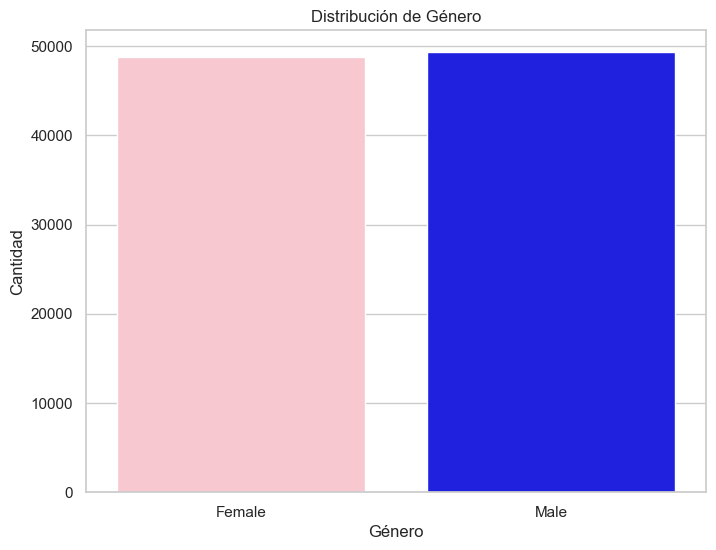

In [41]:
# Visualizamos el patrón que presenta la distribución de los casos presentes en df_copy. 

colores_genero = {'Female': 'pink', 'Male': 'blue'}

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df_copy, palette=colores_genero)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Género')
plt.show()

- Observamos una dristribución bastante simétrica entre una y otra, no vemos patrones significativos.

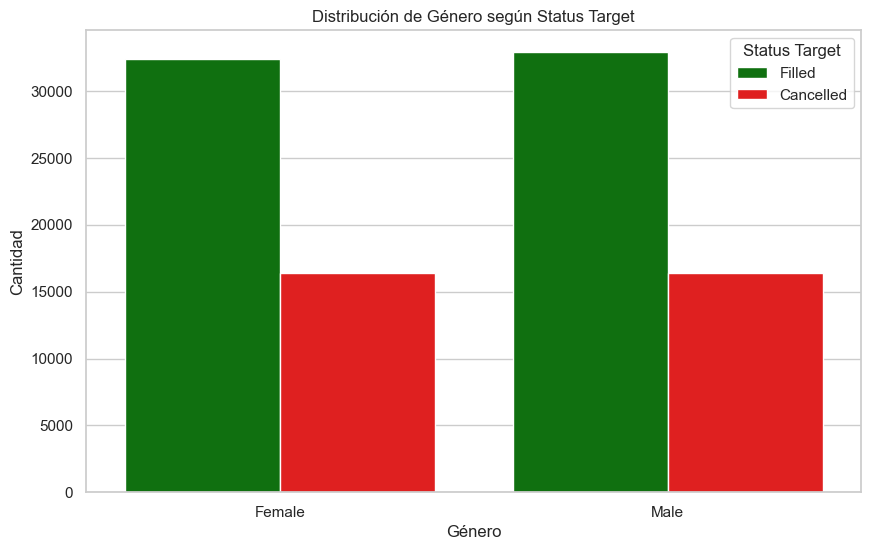

In [42]:
# Buscamos realizar un análisis bivariado entre ['Gender'] y nuestro Target. 

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Status Target', data=df_copy, palette={0: 'green', 1: 'red'})

plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Género según Status Target')
plt.legend(title='Status Target', loc='upper right', labels=['Filled', 'Cancelled'])
plt.show()


- Podemos establecer que de manera directa la variable ***['Gender']*** por si ***sola***, ***no presenta patrones*** significativos para nuestro algoritmo. Quizás desglozada con otras variables adquiera mas sentido.

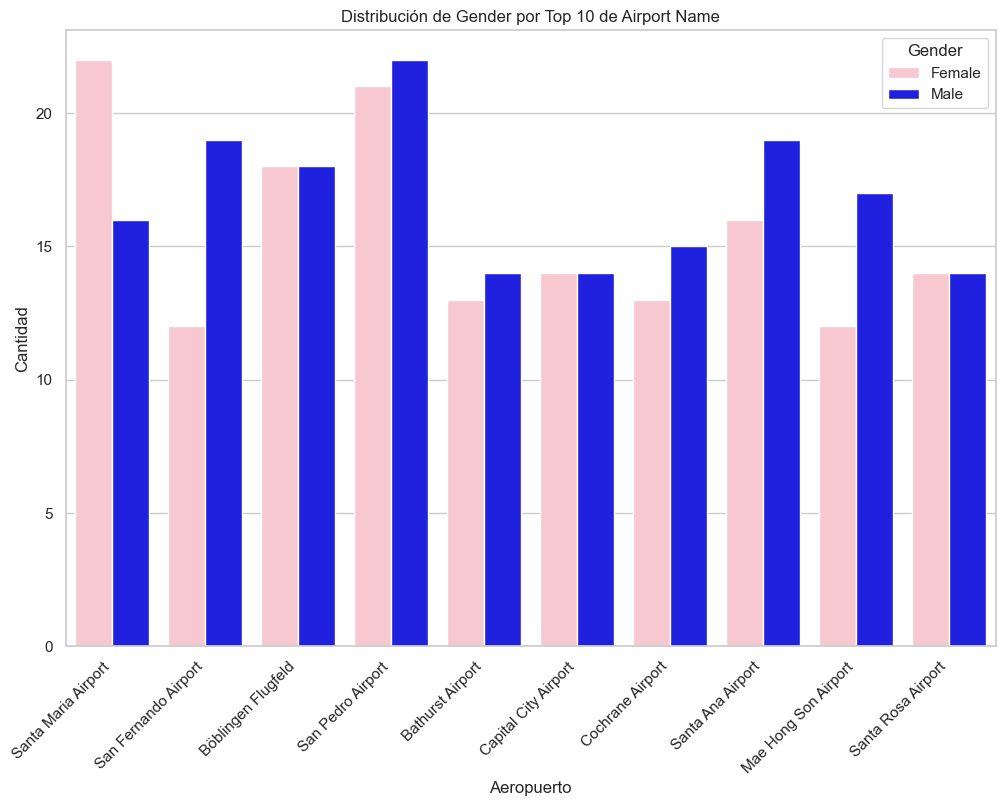

In [43]:
# Graficamos el comportamiento de ['Gender'] con respecto a ['Airport Name'] para entender el comportamiento de estas varibables entre sí.

top_airports = df_copy['Airport Name'].value_counts().head(10).index

df_top_airports = df_copy[df_copy['Airport Name'].isin(top_airports)]

plt.figure(figsize=(12, 8))
sns.countplot(x='Airport Name', hue='Gender', data=df_top_airports, palette={'Male': 'blue', 'Female': 'pink'})
plt.xlabel('Aeropuerto')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Top 10 de Airport Name')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

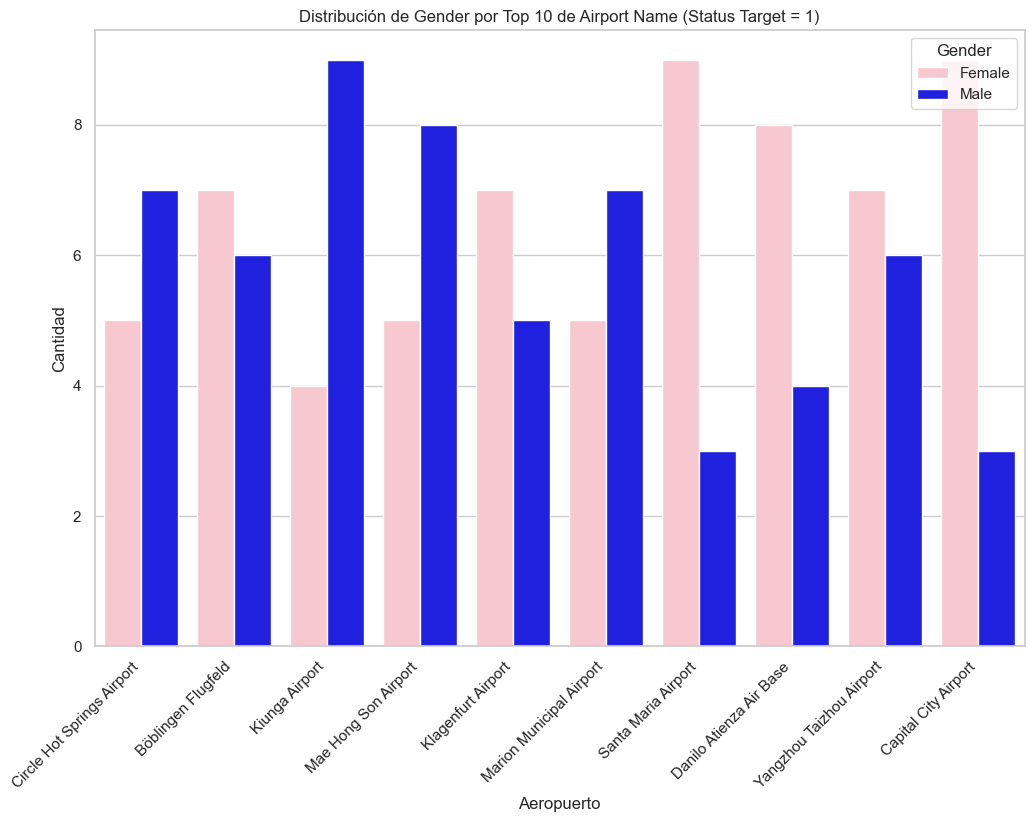

In [44]:
# Ahora procedemos a obervar si existe patrón entre ambas cuando ['Status Target'] es 1.


df_status_1 = df_copy[df_copy['Status Target'] == 1]

top_airports_status_1 = df_status_1['Airport Name'].value_counts().head(10).index

df_top_airports_status_1 = df_copy[(df_copy['Airport Name'].isin(top_airports_status_1)) & (df_copy['Status Target'] == 1)]

plt.figure(figsize=(12, 8))
sns.countplot(x='Airport Name', hue='Gender', data=df_top_airports_status_1, palette={'Male': 'blue', 'Female': 'pink'})
plt.xlabel('Aeropuerto')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender por Top 10 de Airport Name (Status Target = 1)')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

- Observamos que existe ***mayor variación*** que en otros casos cuando ***['Status Traget']*** es ***1***. Podría ser un factor a incluir en el modelo predictivo ya que, hay Airports en donde el mayor número de cancelaciones es female, y otros donde es male, por ende se puede decir que dependiendo el ***['Airport Name']*** existe un % de probabilidad de cancelled dependiendo el género.

In [45]:
# Crearemos dos columnas en nuestro df_copy, las cuales senrán ['Cancellation Percentage Female'] y ['Cancellation Percentage Male']
# Para ello calculamos el total de vuelos y el total de vuelos cancelados para cada aeropuerto.
# Dividimos el total de vuelos cancelados por género entre el total de vuelos para obtener el porcentaje. 


total_flights = df_copy.groupby(['Airport Name', 'Gender']).size().unstack(fill_value=0)
total_cancelled_flights = df_copy[df_copy['Status Target'] == 1].groupby(['Airport Name', 'Gender']).size().unstack(fill_value=0)

cancellation_percentage_by_gender = (total_cancelled_flights / total_flights) * 100
cancellation_percentage_by_gender = cancellation_percentage_by_gender.reset_index()

df_copy = pd.merge(df_copy, cancellation_percentage_by_gender, on=['Airport Name'], how='left')

df_copy = df_copy.rename(columns={'Female': 'Cancellation Percentage Female', 'Male': 'Cancellation Percentage Male'})

In [46]:
# Controlamos los valores generados, ya que posiblemente al encontrarse en casos donde no haya vuelos de un género registrados, puede arrojarnos un NaN.

count_female = df_copy['Cancellation Percentage Female'].count()
nan_female = df_copy['Cancellation Percentage Female'].isna().sum()

count_male = df_copy['Cancellation Percentage Male'].count()
nan_male = df_copy['Cancellation Percentage Male'].isna().sum()

print("Valores en Cancellation Percentage Female:", count_female)
print("Valores NaN en Cancellation Percentage Female:", nan_female)

print("Valores en Cancellation Percentage Male:", count_male)
print("Valores NaN en Cancellation Percentage Male:", nan_male)


Valores en Cancellation Percentage Female: 96199
Valores NaN en Cancellation Percentage Female: 1874
Valores en Cancellation Percentage Male: 96105
Valores NaN en Cancellation Percentage Male: 1968


***Eliminación de Valores NaN en Variables de Cancelación por Género***

En esta etapa de preprocesamiento de datos, se identificaron valores NaN en las variables de "Cancellation Percentage Female" y "Cancellation Percentage Male" en el conjunto de datos. Estos valores NaN representan la ***falta de registros de vuelos cancelados para ciertos géneros en aeropuertos específicos***.

Dado que los valores NaN en estas variables ***representan solo un 1.94%*** del conjunto de datos y su ***eliminación*** no debería afectar significativamente nuestros análisis posteriores, se ha tomado la decisión de eliminarlos. Esto nos permitirá trabajar con un conjunto de datos más limpio y evitar posibles problemas al tratar con estos valores en modelos de aprendizaje automático.

Los pasos realizados para la eliminación de estos valores NaN son los siguientes:

1. Identificación de los valores NaN en las columnas de "Cancellation Percentage Female" y "Cancellation Percentage Male".
2. Eliminación de los registros correspondientes a estos valores NaN.
3. Verificación de la integridad del conjunto de datos resultante.

La eliminación de estos valores NaN se ha documentado para garantizar la transparencia y reproducibilidad de nuestros análisis.


In [47]:
# Eliminar filas con valores NaN en las columnas especificadas

df_copy.dropna(subset=['Cancellation Percentage Female', 'Cancellation Percentage Male'], inplace=True)

In [48]:
df_copy.head()

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport,Cancellation Percentage per Airport,Cancellation Percentage Female,Cancellation Percentage Male
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot,18.18,16.666667,20.000000
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport,22.22,0.000000,33.333333
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport,26.67,20.000000,30.000000
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport,42.86,75.000000,0.000000
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field,45.45,100.000000,25.000000


Aquí hacemos una breve intervención para acotar de que al parecer hay aeropuertos donde el ***['Cancellation Percentage Female']*** y ***['Cancellation Percentage Male']*** resulta en 0. Buscaremos indagar un poco más sobre esto, dado que podría hacer alusión a algún tipo de patrón.

In [49]:
# Bien acá vamos a ver la cantidad de aeropuertos en donde estás dos nuevas variables son 0 %, como vistazo general.

count_female_zero = df_copy[df_copy['Cancellation Percentage Female'] == 0]['Airport Name'].nunique()

count_male_zero = df_copy[df_copy['Cancellation Percentage Male'] == 0]['Airport Name'].nunique()

count_female_zero, count_male_zero

(1174, 1151)

___

In [50]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport,Cancellation Percentage per Airport,Cancellation Percentage Female,Cancellation Percentage Male
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot,18.18,16.666667,20.000000
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport,22.22,0.000000,33.333333
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport,26.67,20.000000,30.000000
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport,42.86,75.000000,0.000000
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field,45.45,100.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98068,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport,22.22,25.000000,20.000000
98069,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja,21.43,16.666667,25.000000
98070,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos,46.15,75.000000,33.333333
98071,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa,20.00,40.000000,0.000000


___

<h3 align="center">Segmento variable ['Age']</h3>


___

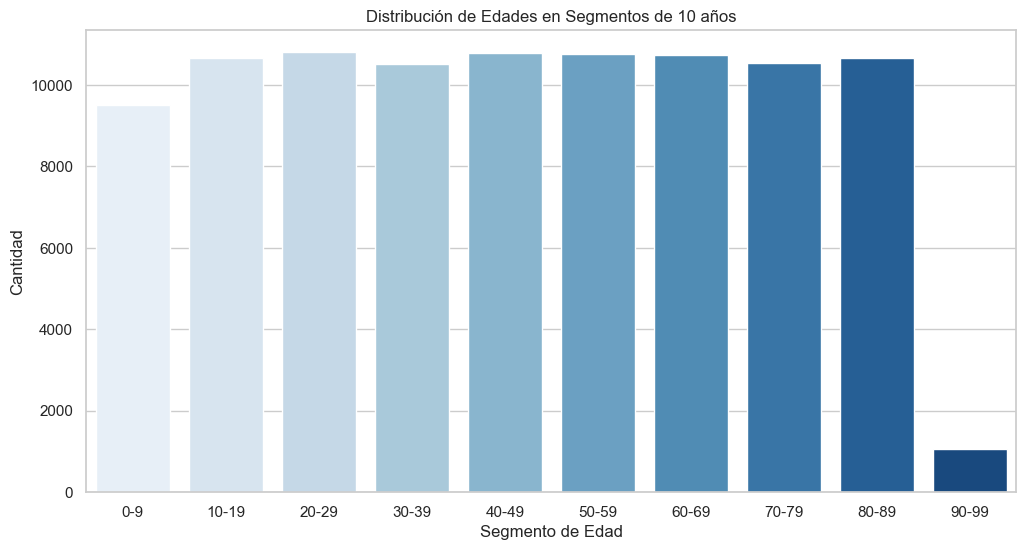

In [51]:
# Procedemos a graficar ['Age'] de manera univariada, para empezar a tener una idea sobre como se comporta dicha variable.

df_copy['Age Segment'] = pd.cut(df_copy['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

plt.figure(figsize=(12, 6))
sns.countplot(x='Age Segment', data=df_copy, palette='Blues')
plt.xlabel('Segmento de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades en Segmentos de 10 años')
plt.show()


df_copy.drop('Age Segment', axis=1, inplace=True)

- Observamos que ***['Age']*** por si sola, solo presenta una variación en el segmento entre 90 y 100 pero solo por la escasez de casos que existen en ese rango, no por otras cuestiones. 

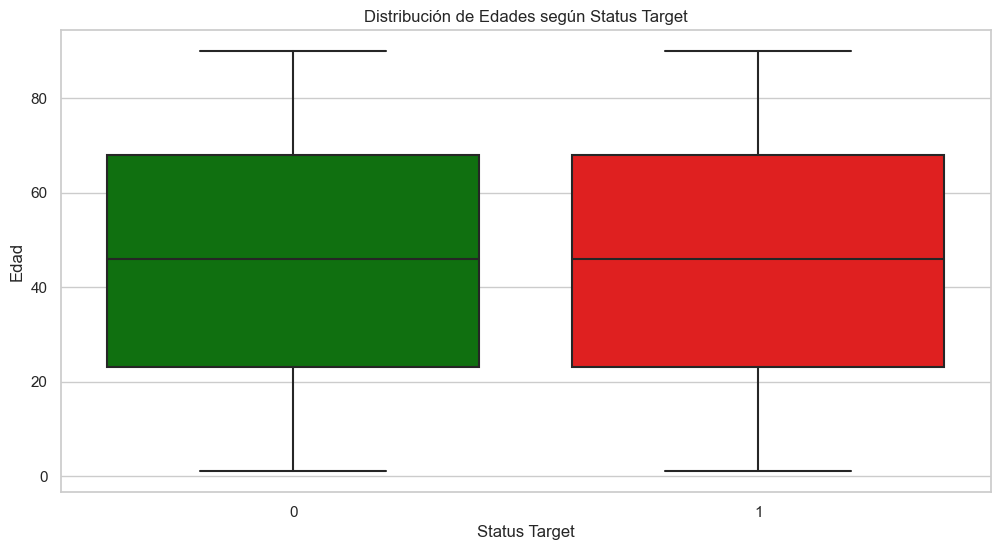

In [52]:
# Análisis bivariado de ['Age'] vs ['Status Target'], para corroborar si existen anomalías.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Status Target', y='Age', data=df_copy, palette={0: 'green', 1: 'red'})
plt.xlabel('Status Target')
plt.ylabel('Edad')
plt.title('Distribución de Edades según Status Target')
plt.show()

- En el caso del análisis bivariado de ***['Age']*** vs ***['Status Target']***, vemos que no presenta anomalías de ningún tipo tampoco. Por ende la variable por si sola carece de impacto en el modelo predictivo. Deberíamos tratar de mezclarlas con otras para ver si le agregamos valor.

___

<h3 align="center">Segmento variable ['Nationality']</h3>


___

In [53]:
# Observamos un total de 240 Nacionalidades alojadas en el data set.

df_copy['Nationality'].nunique()

240

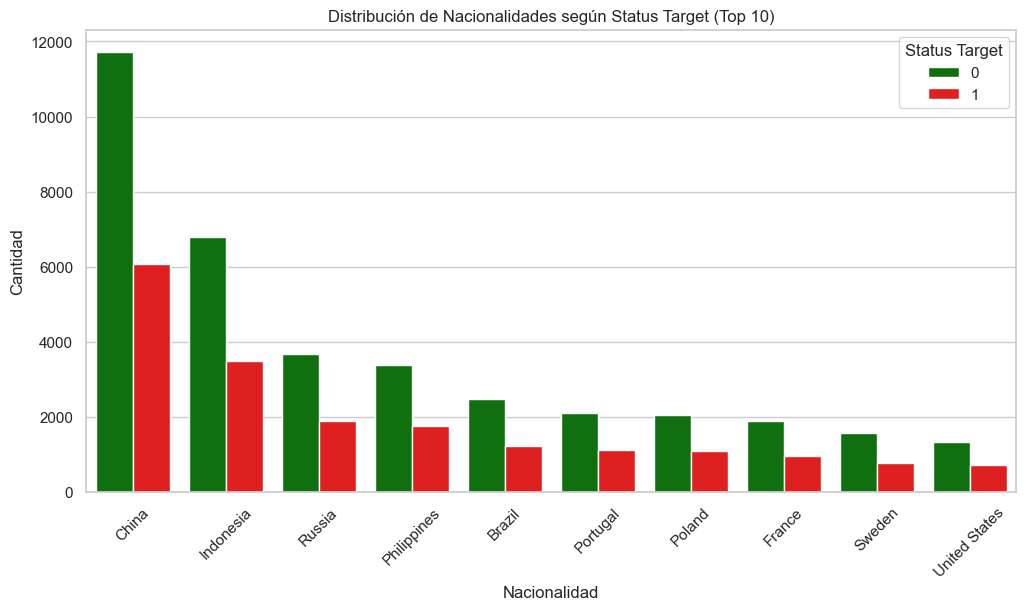

In [54]:
# Creamos un Top 10 de ['Nationality'] y lo trasladamos a un gráfico de barras, para empezar a entender sobre el comportamiento de dicha variable.

top_nationalities = df_copy['Nationality'].value_counts().nlargest(10).index

df_top_nationalities = df_copy[df_copy['Nationality'].isin(top_nationalities)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Nationality', hue='Status Target', data=df_top_nationalities, palette={0: 'green', 1: 'red'}, order=top_nationalities)
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad')
plt.title('Distribución de Nacionalidades según Status Target (Top 10)')
plt.xticks(rotation=45)
plt.legend(title='Status Target', loc='upper right')
plt.show()


- A grandes rasgos se puede observar como una tendencia 1/2 de Filled con respecto de Cancelled. Parece a modo de vista general que los casos cancelled son tendencialmente a ser aproximadamente 1/2 de los filled.

In [55]:
# Realizamos un sondeo para encontrar anomalías con respecto al comportamiento que describimos 1/2 de filled vs cancelled. 

half_filled_count = df_copy[df_copy['Status Target'] == 0].shape[0] / 2

error_margin_percentage = 7  # Pusimos un 7% de margen de error, para intentar contemplar lo más mínimo.

lower_bound = half_filled_count - (half_filled_count * error_margin_percentage / 100)
upper_bound = half_filled_count + (half_filled_count * error_margin_percentage / 100)

df_filtered = df_copy.groupby('Nationality')['Status Target'].apply(lambda x: np.logical_or(x.sum() < lower_bound, x.sum() > upper_bound)).reset_index()

nationalities_out_of_range = df_filtered[df_filtered['Status Target']]

nationalities_out_of_range

,Nationality,Status Target
0,Afghanistan,True
1,Aland Islands,True
2,Albania,True
3,Algeria,True
4,American Samoa,True
...,...,...
235,Wallis and Futuna,True
236,Western Sahara,True
237,Yemen,True
238,Zambia,True


- Encontramos que en 240 filas el patrón 1/2 aprox entre filled vs cancelled parece no presentarse.

In [56]:
# Creamos una división de la variable ['nationalities_out_of_range'] en donde por un lado buscaremos los valores donde los cancellados superan la relación 1/2 y los que no, en ambos casos contemplando un margen de error del 8%.

df_ratios = df_copy.groupby('Nationality')['Status Target'].mean().reset_index()


error_margin_percentage = 7  

lower_bound = 0.5 - (0.5 * error_margin_percentage / 100)
upper_bound = 0.5 + (0.5 * error_margin_percentage / 100)

nationalities_greater_than_50  = df_ratios[df_ratios['Status Target'] > upper_bound]

nationalities_less_than_50  = df_ratios[df_ratios['Status Target'] < lower_bound]

print("Nacionalidades donde la relación es mayor al 50% con margen de error:")
print(nationalities_greater_than_50 )

print("\nNacionalidades donde la relación es menor al 50% con margen de error:")
print(nationalities_less_than_50 )


Nacionalidades donde la relación es mayor al 50% con margen de error:
                   Nationality  Status Target
3                      Algeria       0.666667
23                     Bermuda       0.714286
30      British Virgin Islands       1.000000
48                Cook Islands       1.000000
69               Faroe Islands       0.545455
123                      Macao       1.000000
132                 Martinique       0.571429
147                      Nauru       0.571429
155                       Niue       0.666667
183  Saint Pierre and Miquelon       0.750000
193                  Singapore       0.666667
197            Solomon Islands       0.545455

Nacionalidades donde la relación es menor al 50% con margen de error:
           Nationality  Status Target
0          Afghanistan       0.358442
1        Aland Islands       0.250000
2              Albania       0.343387
4       American Samoa       0.230769
6               Angola       0.375000
..                 ...           

In [57]:
nationalities_greater_than_50 .value_counts().sum()

12

In [58]:
nationalities_less_than_50 .value_counts().sum()

211

- Con esto notamos que hay 10 Nacionalidades con una tendencia a tener mayor % de cancelaciones por sobre el resto. En contra parte vemos como también existen 216 que se comportan de manera contraria, con una tendencia bajista en este área. Es un patrón considerable a la hora de construir nuestro modelo predictivo.

In [59]:
# Filtramos las Nacionalidades que estén por debajo de un 0.6 % en Status Target.

nationalities_greater_than_60 = nationalities_greater_than_50[nationalities_greater_than_50['Status Target'] > 0.6].copy()

nationalities_greater_than_60

,Nationality,Status Target
3,Algeria,0.666667
23,Bermuda,0.714286
30,British Virgin Islands,1.000000
48,Cook Islands,1.000000
123,Macao,1.000000
155,Niue,0.666667
183,Saint Pierre and Miquelon,0.750000
193,Singapore,0.666667


Posiblemente esta sea una variable a insertar en nuestro algoritmo predictivo.

In [60]:
# Agrupamos por nacionalidad y calculamos el porcentaje de vuelos cancelados. Luego creamos una nueva columna en df_copy con los porcentajes calculados.

nationality_cancelled_percentage = df_copy.groupby('Nationality')['Status Target'].mean() * 100

df_copy['nationality_cancelled_percentage'] = df_copy['Nationality'].map(nationality_cancelled_percentage)

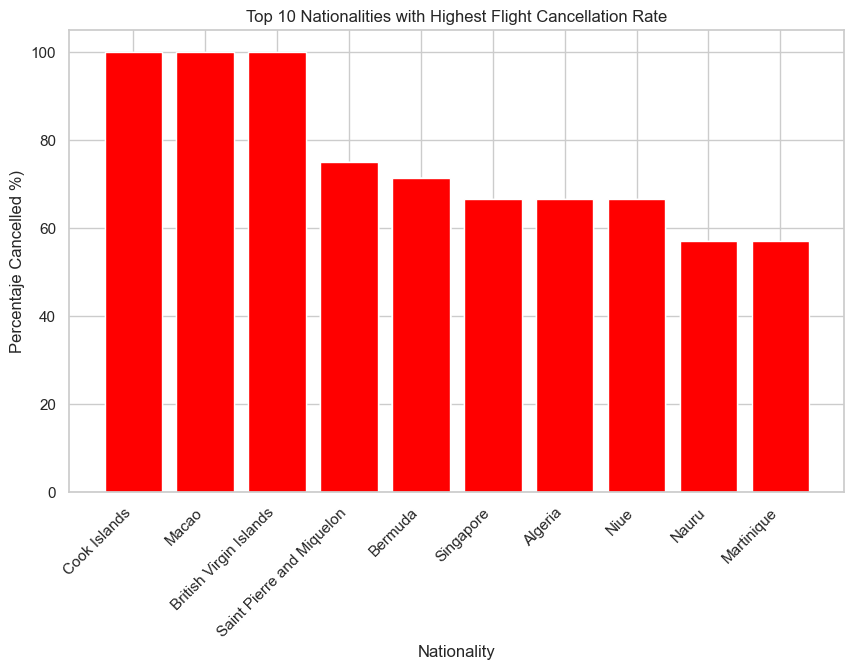

In [61]:
# Buscamos ver un top 10 de nacionalidades con mayor tasa de cancelación.

top_10_nationalities = df_copy.nlargest(30, 'nationality_cancelled_percentage')

plt.figure(figsize=(10, 6))
plt.bar(top_10_nationalities['Nationality'], top_10_nationalities['nationality_cancelled_percentage'], color='red')
plt.xlabel('Nationality')
plt.ylabel('Percentaje Cancelled %)')
plt.title('Top 10 Nationalities with Highest Flight Cancellation Rate')
plt.xticks(rotation=45, ha='right')  
plt.show()

Evidentemente notamos hay ***nacionalidades*** que tienen una tendencia a tener un ***porcentaje considerable en cancelaciones*** de vuelos, lo cual nos demarca una buena variable para nuestro modelo predictor. 

___

<center>

### Segmento variable ['Country']

</center>


___

In [62]:
# Controlamos la cantidad de Paises contemplados en nuestro data set.

df_copy['Country'].nunique()

234

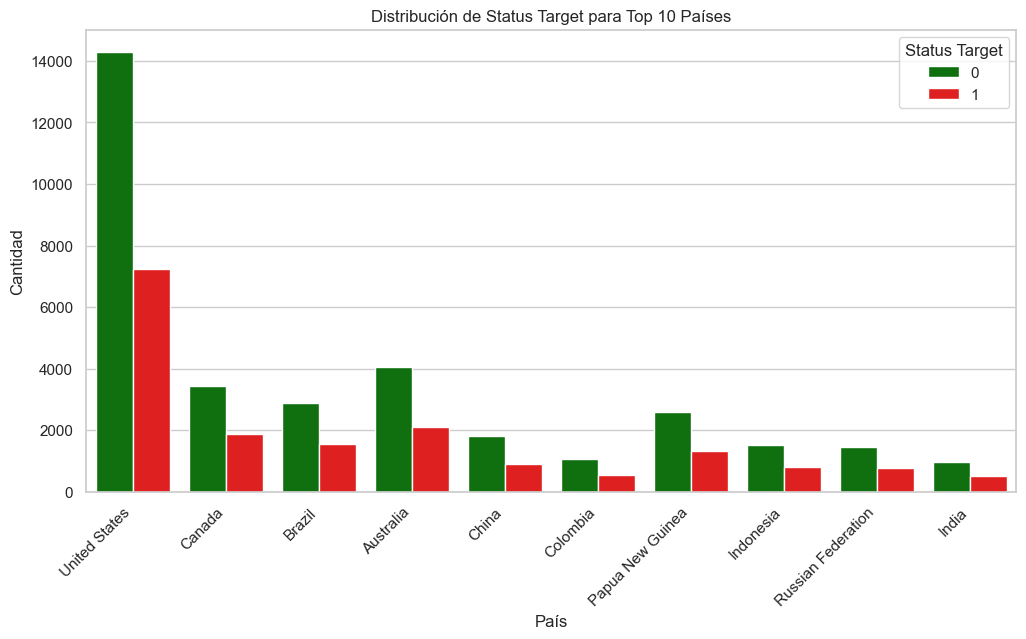

In [63]:
# Crearemos un top 10 de ['Country'] para posteriormente graficarlo y empezar a tener una comprensión del comportamiento de dicha variable con respecto al Target.

top_countries = df_copy['Country'].value_counts().head(10).index

df_top_countries = df_copy[df_copy['Country'].isin(top_countries)]

custom_palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Status Target', data=df_top_countries, palette=custom_palette)
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Distribución de Status Target para Top 10 Países')
plt.legend(title='Status Target')
plt.xticks(rotation=45, ha='right')
plt.show()


In [64]:
# Veamos ahora la lista de países en donde la cantidad de cancelled supera la cantidad de filled.

df_cancelled_vs_filled = df_copy.groupby('Country')['Status Target'].value_counts().unstack().fillna(0)

countries_more_cancelled_than_filled = df_cancelled_vs_filled[df_cancelled_vs_filled[1] > df_cancelled_vs_filled[0]]

num_countries_more_cancelled_than_filled = len(countries_more_cancelled_than_filled)

num_countries_more_cancelled_than_filled

3

- Considerando que el ***df aloja*** la información acerca de ***235 países***, no es necesario profundizar en aquellos casos en donde la cantidad de cancelled es mayor a los filled, dado que solo representa un 1,27 % del total. No es una variable muy óptima para incluir en el modelo. Buscaremos desglozar ['Country'] con otro tipo de variables.

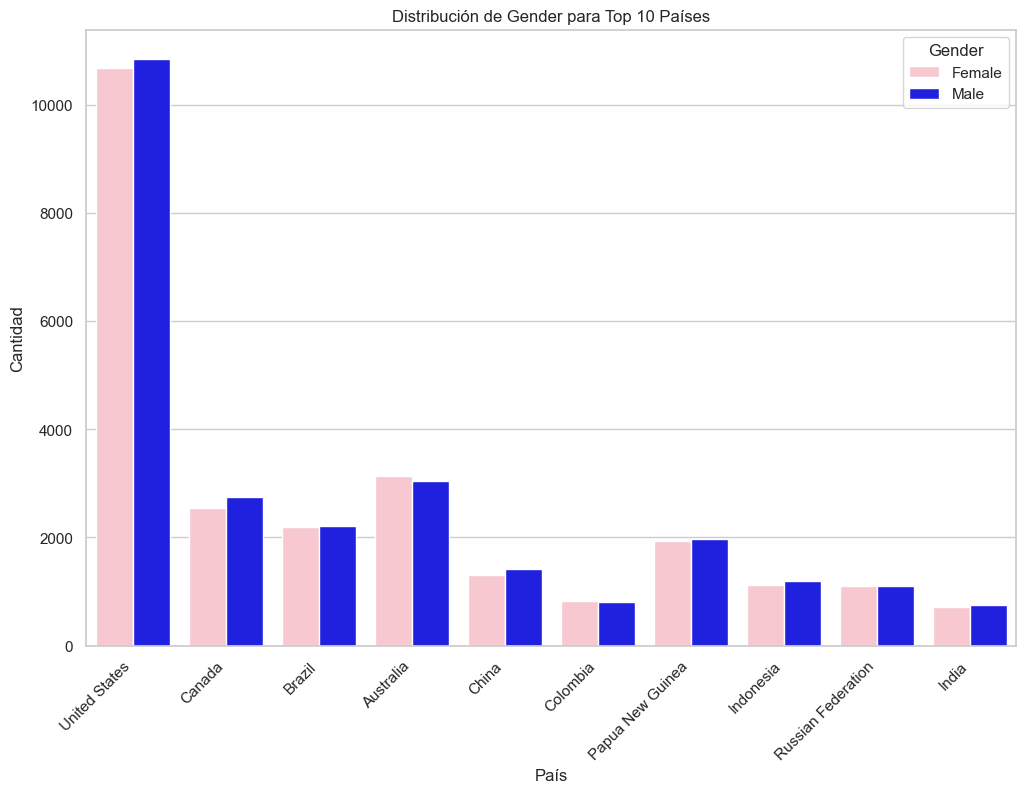

In [65]:
# Obervemos el patrón que puede presentar la variable ['Country'] con respecto a ['Gender'] en busca de anomalías.

colors = {'Male': 'blue', 'Female': 'pink'}


plt.figure(figsize=(12, 8))
sns.countplot(x='Country', hue='Gender', data=df_top_countries, palette=colors, dodge=True)
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Distribución de Gender para Top 10 Países')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

- No observamos anomalías significativas para incluir en el modelo predictivo.

___

In [66]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport,Cancellation Percentage per Airport,Cancellation Percentage Female,Cancellation Percentage Male,nationality_cancelled_percentage
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,6/28/2022,0,Coldfoot,18.18,16.666667,20.000000,33.826038
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,12/26/2022,0,Kugluktuk Airport,22.22,0.000000,33.333333,35.714286
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,1/18/2022,0,Grenoble-Isere Airport,26.67,20.000000,30.000000,34.005401
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,9/16/2022,0,Gatineau Airport,42.86,75.000000,0.000000,34.142095
4,5,Male,21,China,Gillespie Field,United States,North America,2/25/2022,0,Gillespie Field,45.45,100.000000,25.000000,34.142095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98068,98615,Male,85,China,Hasvik Airport,Norway,Europe,12/11/2022,1,Hasvik Airport,22.22,25.000000,20.000000,34.142095
98069,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,10/30/2022,1,Ambanja,21.43,16.666667,25.000000,34.005401
98070,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,9/10/2022,0,Los Llanos,46.15,75.000000,33.333333,33.934139
98071,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,10/26/2022,1,Gagnoa,20.00,40.000000,0.000000,34.142095


___

# Segmento variable ['Departure Date']

___

Primero que nada, vamos a convertir la columna al tipo datetime y crear tres columnas temporales en df_copy que son: ***'Month'***, ***'Week'*** y ***'DayOfWeek'*** (Year no la incluimos dado que el df solo consta con información referida al 2022). Visualizaremos a groso modo el comportamiento de dichas columnas para observar algún tipo de indicio inicial.

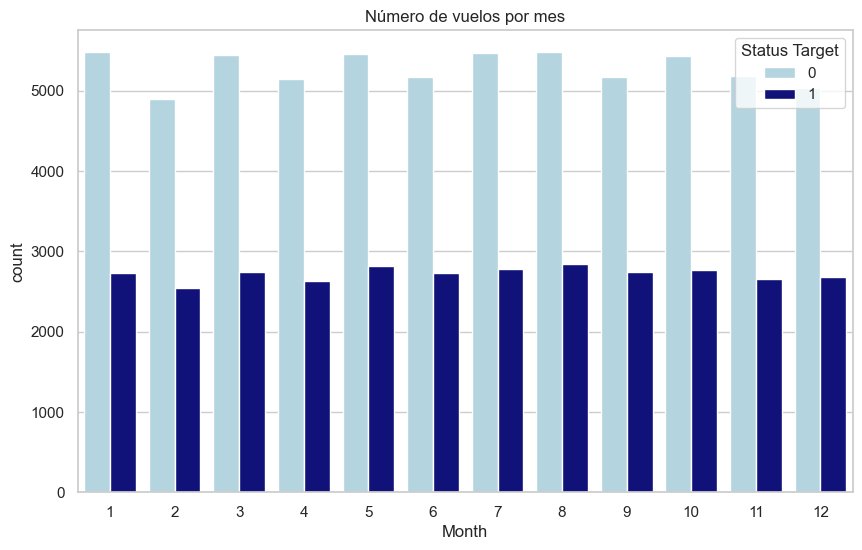

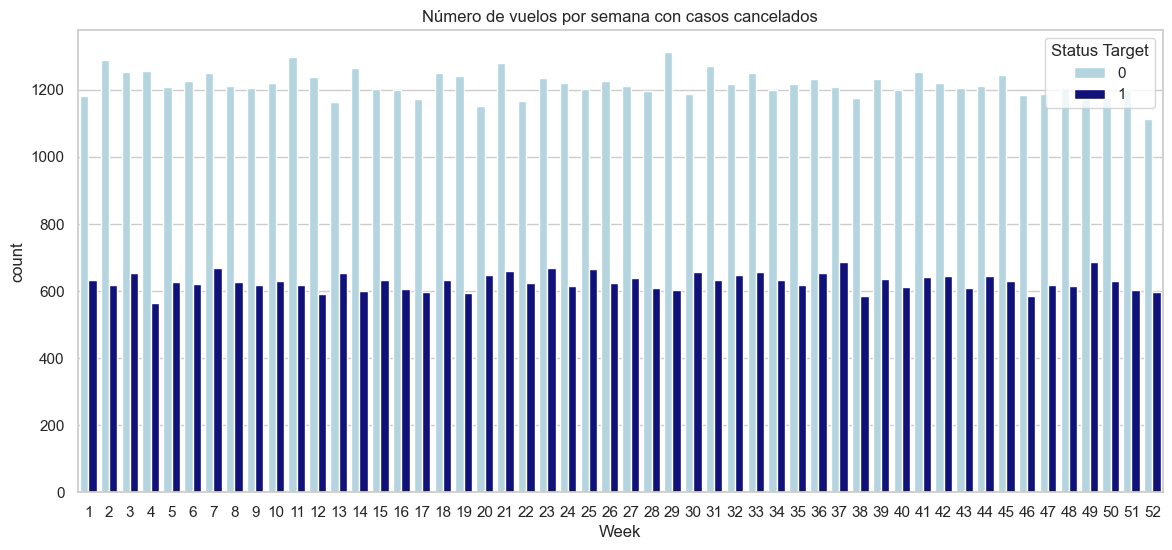

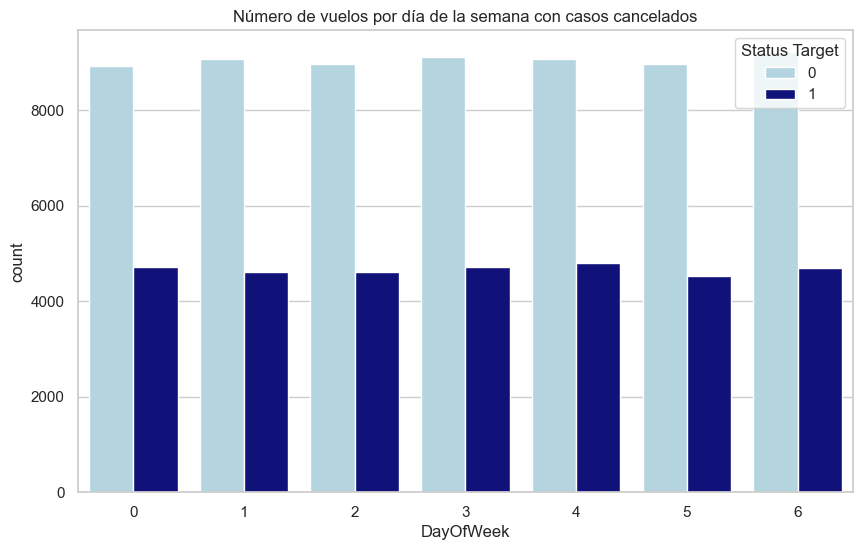

In [67]:
df_copy['Departure Date'] = pd.to_datetime(df_copy['Departure Date'])

df_copy['Month'] = df_copy['Departure Date'].dt.month
df_copy['Week'] = df_copy['Departure Date'].dt.isocalendar().week
df_copy['DayOfWeek'] = df_copy['Departure Date'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Status Target', data=df_copy, palette={0: 'lightblue', 1: 'darkblue'})
plt.title('Número de vuelos por mes')
plt.show()


plt.figure(figsize=(14, 6))
sns.countplot(x='Week', data=df_copy, hue='Status Target', palette={0: 'lightblue', 1: 'darkblue'})
plt.title('Número de vuelos por semana con casos cancelados')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df_copy, hue='Status Target', palette={0: 'lightblue', 1: 'darkblue'})
plt.title('Número de vuelos por día de la semana con casos cancelados')
plt.show()

In [68]:
# Agrupamos por mes y calculamos la cantidad de vuelos y cancelados.

df_grouped = df_copy.groupby(['Month', 'Status Target']).size().unstack().reset_index()

df_grouped.columns = ['Month', 'Not Cancelled', 'Cancelled']
df_grouped

,Month,Not Cancelled,Cancelled
0,1,5478,2729
1,2,4898,2543
2,3,5445,2747
3,4,5149,2628
4,5,5451,2822
5,6,5170,2726
6,7,5465,2783
7,8,5477,2842
8,9,5164,2742
9,10,5427,2769


In [69]:
# Agrupamos por semana y calculamos la cantidad de vuelos y cancelados

df_week_grouped = df_copy.groupby(['Week', 'Status Target']).size().unstack().reset_index()
df_week_grouped.columns = ['Week', 'Not Cancelled', 'Cancelled']

df_week_grouped

,Week,Not Cancelled,Cancelled
0,1,1182,634
1,2,1290,619
2,3,1254,653
3,4,1257,563
4,5,1208,628
5,6,1227,622
6,7,1251,669
7,8,1210,626
8,9,1205,619
9,10,1219,630


In [70]:
df_cancelled_by_airport_week = df_copy.groupby(['Airport Name', 'Week'])[['Status Target']].agg(['count', 'sum']).reset_index()

df_cancelled_by_airport_week.columns = ['Airport Name', 'Week', 'Total Flights', 'Cancelled Flights']

df_cancelled_by_airport_week['Cancelled Percentage per Week'] = (df_cancelled_by_airport_week['Cancelled Flights'] / df_cancelled_by_airport_week['Total Flights']) * 100
df_cancelled_by_airport_week

,Airport Name,Week,Total Flights,Cancelled Flights,Cancelled Percentage per Week
0,28 de Noviembre Airport,1,1,1,100.0
1,28 de Noviembre Airport,6,1,0,0.0
2,28 de Noviembre Airport,9,1,0,0.0
3,28 de Noviembre Airport,10,1,0,0.0
4,28 de Noviembre Airport,12,1,1,100.0
...,...,...,...,...,...
86450,Žilina Airport,37,1,0,0.0
86451,Žilina Airport,38,1,1,100.0
86452,Žilina Airport,48,1,1,100.0
86453,Žilina Airport,50,1,0,0.0


Proceso de Agrupación y Cálculo de Porcentaje de Vuelos Cancelados por Aeropuerto y Semana

1. **Agrupación de Datos:** Inicialmente, los datos se agruparon por las variables 'Airport Name' y 'Week' para facilitar el análisis.

2. **Cálculo de la Suma de Vuelos y Vuelos Cancelados:** Se calculó la suma total de vuelos y vuelos cancelados para cada combinación única de aeropuerto y semana.

3. **Renombrado de Columnas:** Las columnas resultantes se renombraron para mayor claridad y coherencia en la interpretación de los resultados.

4. **Cálculo del Porcentaje de Vuelos Cancelados:** A partir de la suma de vuelos y vuelos cancelados, se calculó el porcentaje de vuelos cancelados en relación con el total de vuelos para cada semana y aeropuerto.

Este proceso nos permite entender la distribución de vuelos cancelados en función de la ubicación del aeropuerto y la semana del año, proporcionando insights importantes para la toma de decisiones y la planificación estratégica.


In [71]:
# Renombramos la columna "Cancelled Percentage per Week" a "Cancelled Percentage Week_Airport"
df_cancelled_by_airport_week.rename(columns={'Cancelled Percentage per Week': 'Cancelled Percentage Week_Airport'}, inplace=True)

# Combinamos df_copy con los datos de Cancelled Percentage per Week usando 'Airport Name' y 'Week' como claves de combinación
df_copy = df_copy.merge(df_cancelled_by_airport_week, how='left', on=['Airport Name', 'Week'])

In [72]:
df_copy

,Passenger ID,Gender,Age,Nationality,Airport Name,Country,Continents,Departure Date,Status Target,Arrival Airport,Cancellation Percentage per Airport,Cancellation Percentage Female,Cancellation Percentage Male,nationality_cancelled_percentage,Month,Week,DayOfWeek,Total Flights,Cancelled Flights,Cancelled Percentage Week_Airport
0,1,Female,62,Japan,Coldfoot Airport,United States,North America,2022-06-28,0,Coldfoot,18.18,16.666667,20.000000,33.826038,6,26,1,1,0,0.0
1,2,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,2022-12-26,0,Kugluktuk Airport,22.22,0.000000,33.333333,35.714286,12,52,0,1,0,0.0
2,3,Male,67,Russia,Grenoble-Isère Airport,France,Europe,2022-01-18,0,Grenoble-Isere Airport,26.67,20.000000,30.000000,34.005401,1,3,1,1,0,0.0
3,4,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,2022-09-16,0,Gatineau Airport,42.86,75.000000,0.000000,34.142095,9,37,4,1,0,0.0
4,5,Male,21,China,Gillespie Field,United States,North America,2022-02-25,0,Gillespie Field,45.45,100.000000,25.000000,34.142095,2,8,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95990,98615,Male,85,China,Hasvik Airport,Norway,Europe,2022-12-11,1,Hasvik Airport,22.22,25.000000,20.000000,34.142095,12,49,6,2,1,50.0
95991,98616,Female,19,Russia,Ampampamena Airport,Madagascar,Africa,2022-10-30,1,Ambanja,21.43,16.666667,25.000000,34.005401,10,43,6,1,1,100.0
95992,98617,Male,65,Indonesia,Albacete-Los Llanos Airport,Spain,Europe,2022-09-10,0,Los Llanos,46.15,75.000000,33.333333,33.934139,9,36,5,1,0,0.0
95993,98618,Female,34,China,Gagnoa Airport,Côte d'Ivoire,Africa,2022-10-26,1,Gagnoa,20.00,40.000000,0.000000,34.142095,10,43,2,1,1,100.0


___

<h1 align="center" style="font-size: 36px;">DecisionTree</h1>


___

Elegimos nuestro modelo y procedemos a seleccionar las columnas necesarias y crear un nuevo DataFrame dichas columnas. Posteriormente dividimos df_copy en conjunto de entrenamiento y prueba para definir las variables independientes (X) y la variable dependiente (y) en el mismo. Por último creamos el modelo de árbol de decisiones con los hiperparámetros específicos, creamos el pipeline que incluye el preprocesamiento y el modelo, ajustamos el modelo al conjunto de entrenamiento, realizamos predicciones en el conjunto de prueba y presentamos en pantalla el rendimiento del modelo.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

selected_columns = ['Passenger ID', 'Gender', 'Nationality', 'Airport Name', 'Country', 
                    'Continents', 'Status Target', 'Cancellation Percentage per Airport', 
                    'Cancellation Percentage Female', 'Cancellation Percentage Male']

df_selected = df_copy[selected_columns].copy()

df_train, df_test = train_test_split(df_selected, test_size=0.2, random_state=42)

X_train_tree = df_train.drop('Status Target', axis=1)
y_train_tree = df_train['Status Target']

X_test_tree = df_test.drop('Status Target', axis=1)
y_test_tree = df_test['Status Target']

numeric_features = ['Passenger ID', 'Cancellation Percentage per Airport', 
                    'Cancellation Percentage Female', 'Cancellation Percentage Male']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Nationality', 'Airport Name', 'Country', 'Continents']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=42)

pipeline_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', tree_model)])

pipeline_tree.fit(X_train_tree, y_train_tree)

y_pred_tree = pipeline_tree.predict(X_test_tree)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
classification_report_tree = classification_report(y_test_tree, y_pred_tree)
confusion_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)

print("Accuracy:", accuracy_tree)
print("\nClassification Report:\n", classification_report_tree)
print("Confusion Matrix:\n", confusion_matrix_tree)


Accuracy: 0.6781603208500443

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.80     12648
           1       0.61      0.16      0.25      6551

    accuracy                           0.68     19199
   macro avg       0.65      0.55      0.52     19199
weighted avg       0.66      0.68      0.61     19199

Confusion Matrix:
 [[11994   654]
 [ 5525  1026]]


Recall y f1-score presentan valores muy bajos, es necesario mejorar las features del modelo para aumentar sus valores.


In [74]:
# A través de GridSearch volvemos a intentar una mejora de modelo con nuevos parámetros y comparamos con los resultados obtenidos.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_tree, y_train_tree)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Mejores parámetros encontrados:")
print(best_params)

y_pred_best = best_estimator.predict(X_test_tree)

accuracy_best = accuracy_score(y_test_tree, y_pred_best)
print("\nPrecisión del mejor modelo en el conjunto de prueba:", accuracy_best)

Mejores parámetros encontrados:
{'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Precisión del mejor modelo en el conjunto de prueba: 0.682275118495755


In [75]:
# Aplicamos parámetros y checkeamos resultados.

pipeline_tree.set_params(classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2)

pipeline_tree.fit(X_train_tree, y_train_tree)

y_pred_tree = pipeline_tree.predict(X_test_tree)

accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
classification_report_tree = classification_report(y_test_tree, y_pred_tree)
confusion_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)

print("Accuracy:", accuracy_tree)
print("\nClassification Report:\n", classification_report_tree)
print("Confusion Matrix:\n", confusion_matrix_tree)


Accuracy: 0.682275118495755

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79     12648
           1       0.57      0.27      0.37      6551

    accuracy                           0.68     19199
   macro avg       0.64      0.58      0.58     19199
weighted avg       0.66      0.68      0.64     19199

Confusion Matrix:
 [[11343  1305]
 [ 4795  1756]]


Volvemos a obtener un recall y f1-score bajos para detectar Status Target 1. Será de suma importancia encontrar features más sólidas a la hora del aporte para el modelo. Necesitaremos trabajar mejor en la columna ['Departure Date'], ver si combinada con alguna otra variable más, conseguimos profundizar en estos valores obtenidos. Por otra parte ['Arrival Airport'] y ['Age'] son columnas que estoy analizando descartarlas en el uso del modelo. No encontré valor significativo en ambas aún. 

In [76]:
# Probamos nuevamente pero agregando la variable Week y Cancelled Percentage Week_Airport.

selected_columns = ['Passenger ID', 'Gender', 'Nationality', 'Airport Name', 'Country', 
                    'Continents', 'Status Target', 'Cancellation Percentage per Airport', 
                    'Cancellation Percentage Female', 'Cancellation Percentage Male',
                    'Week', 'Cancelled Percentage Week_Airport']

df_selected = df_copy[selected_columns].copy()

df_train, df_test = train_test_split(df_selected, test_size=0.2, random_state=42)

X_train_tree = df_train.drop('Status Target', axis=1)
y_train_tree = df_train['Status Target']

X_test_tree = df_test.drop('Status Target', axis=1)
y_test_tree = df_test['Status Target']

numeric_features = ['Passenger ID', 'Cancellation Percentage per Airport', 
                    'Cancellation Percentage Female', 'Cancellation Percentage Male',
                    'Week', 'Cancelled Percentage Week_Airport']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Nationality', 'Airport Name', 'Country', 'Continents']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=42)

pipeline_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', tree_model)])

pipeline_tree.fit(X_train_tree, y_train_tree)

y_pred_tree = pipeline_tree.predict(X_test_tree)

y_pred_train = pipeline_tree.predict(X_train_tree)
accuracy_train = accuracy_score(y_train_tree, y_pred_train)
classification_report_train = classification_report(y_train_tree, y_pred_train)
confusion_matrix_train = confusion_matrix(y_train_tree, y_pred_train)

print("Train Accuracy:", accuracy_train)
print("\nTrain Classification Report:\n", classification_report_train)
print("Train Confusion Matrix:\n", confusion_matrix_train)

Train Accuracy: 0.9570810979738528

Train Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     50680
           1       1.00      0.88      0.93     26116

    accuracy                           0.96     76796
   macro avg       0.97      0.94      0.95     76796
weighted avg       0.96      0.96      0.96     76796

Train Confusion Matrix:
 [[50587    93]
 [ 3203 22913]]


In [77]:
# Aplicamos el modelo al conjunto de prueba y comprobamos resultados.

accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
classification_report_tree = classification_report(y_test_tree, y_pred_tree)
confusion_matrix_tree = confusion_matrix(y_test_tree, y_pred_tree)

print("Accuracy:", accuracy_tree)
print("\nClassification Report:\n", classification_report_tree)
print("Confusion Matrix:\n", confusion_matrix_tree)

Accuracy: 0.9574457002968905

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12648
           1       1.00      0.88      0.93      6551

    accuracy                           0.96     19199
   macro avg       0.97      0.94      0.95     19199
weighted avg       0.96      0.96      0.96     19199

Confusion Matrix:
 [[12633    15]
 [  802  5749]]


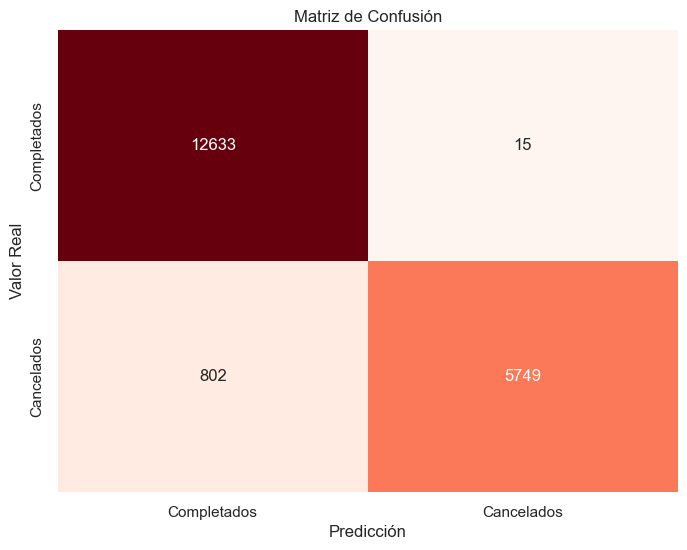

In [78]:
# Graficamos la matriz de confusión.

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_tree, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Completados', 'Cancelados'], yticklabels=['Completados', 'Cancelados'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Estos resultados muestran que nuestro modelo presenta un buen rendimiento en la predicción de vuelos completados y cancelados en el conjunto de prueba, con una alta precisión y un equilibrio adecuado entre sensibilidad y precisión para ambas clases. La agregación de las variables ***['Week']*** y ***['Cancelled Percentaje Week_Airport']*** fueros más que significativas para la optimización del mismo.

___

<h1 align="center" style="font-size: 36px;">Gradient Boosting</h1>


___

En este análisis, utilizaremos la técnica de Gradient Boosting para construir un modelo predictivo con el objetivo de ***predecir*** la ***probabilidad de cancelación*** de vuelos o ***"Cancelled"***.Para lograr esto, primero ***dividiremos df_copy*** en ***df_train*** y ***df_test*** para ***evaluar*** el rendimiento del ***modelo***. Utilizaremos métricas de evaluación estándar, como precisión, recall, F1-score y matriz de confusión, para checkear la capacidad predictiva.

In [79]:
# Codificacamos de Etiquetas para 'Nationality', 'Airport Name' y 'Country'.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Nationality', 'Airport Name', 'Country']:
    df_copy[col + '_label_code'] = label_encoder.fit_transform(df_copy[col])


In [80]:
# Aplicar one-hot encoding a las variables restantes, concatenamos los resultados con el dataframe original y eliminamos las columnas originales después de la codificación.
selected_columns = ['Gender'] 

df_encoded = pd.get_dummies(df_copy[selected_columns], drop_first=True)
df_final = pd.concat([df_copy, df_encoded], axis=1)

df_final.drop(selected_columns, axis=1, inplace=True)

In [81]:
# Dividimos los datos en df_train (80%) y df_test (20%),
df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=42)


In [82]:
# Seleccionamos las variables predictoras y la variable objetivo en df_train.
X_train = df_train[['Passenger ID', 'Airport Name_label_code', 
                    'Cancellation Percentage per Airport', 'Cancellation Percentage Female', 
                    'Cancellation Percentage Male', 'Nationality_label_code', 
                    'nationality_cancelled_percentage', 'Gender_Male', 'Week',
                    'Cancelled Percentage Week_Airport']]
y_train = df_train['Status Target']

# Seleccionamos las variables predictoras y la variable objetivo en df_test.
X_test = df_test[['Passenger ID', 'Airport Name_label_code', 
                  'Cancellation Percentage per Airport', 'Cancellation Percentage Female', 
                  'Cancellation Percentage Male', 'Nationality_label_code', 
                  'nationality_cancelled_percentage', 'Gender_Male', 'Week',
                  'Cancelled Percentage Week_Airport']]
y_test = df_test['Status Target']


In [83]:
# Construimos el modelo Gradient Boosting y entrenamos.
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [84]:
# Hacemos las predicciones sobre el conjunto de entrenamiento.
y_train_pred = gradient_boosting_model.predict(X_train)

# Calculamos métricas de evaluación para el conjunto de entrenamiento.
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print("Train Confusion Matrix:")
print(train_conf_matrix)

Train Accuracy: 0.9607140996926923
Train Precision: 0.936472544499452
Train Recall: 0.9488436207688773
Train F1 Score: 0.9426174943416322
Train Confusion Matrix:
[[48999  1681]
 [ 1336 24780]]


In [85]:
# Aplicamos el modelo entrenado a los datos de prueba que habíamos apartado previamente.
y_pred = gradient_boosting_model.predict(X_test)

# Calculamos métricas de evaluación para controlar resultados predictivos.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9592687119120787
Precision: 0.936318257449705
Recall: 0.9448939093268204
F1 Score: 0.9405865370004558
Confusion Matrix:
[[12227   421]
 [  361  6190]]


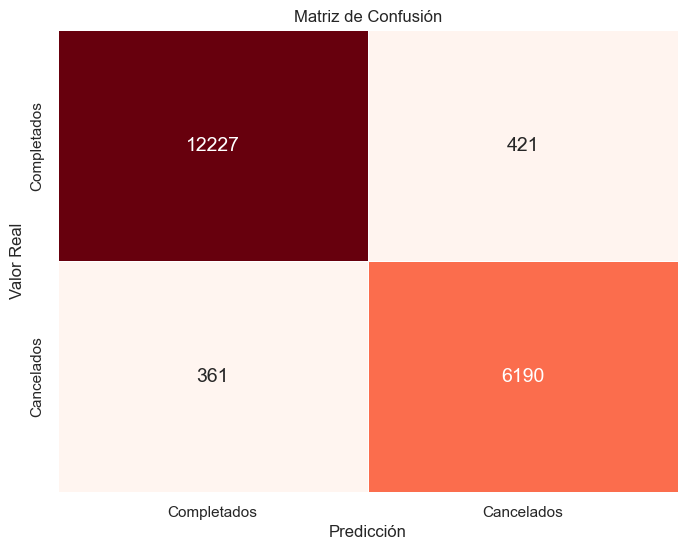

In [86]:
# Graficamos la matriz de confusión.

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, 
            annot_kws={'fontsize': 14}, linewidths=0.5, xticklabels=['Completados', 'Cancelados'], yticklabels=['Completados', 'Cancelados'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Vemos como el modelo tiene un alto rendimiento en la clasificación de vuelos cancelados y no cancelados en el conjunto de datos de prueba. Los valores altos de precisión, recall y F1-score sugieren que el modelo es efectivo para identificar los vuelos cancelados, con una ***precisión del 95.92%***.

___